[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Humboldt-WI/IPML/blob/master/tutorial_notebooks/t5_clustering_master.ipynb)

# Descriptive Analytics Using Clustering

In [13]:
# Standard imports
import numpy as np
import matplotlib.pyplot as plt

## Creating synthetic data for clustering

### Sampling from Gaussian distribution 
We use the function `make_blobs()` from the `sklearn.datasets` module to create synthetic data in 2D for clustering. You can set the number of clusters via the argument `centers`. Also, you can configure the function such that it returns the locations of the cluster centers. This will be useful for later comparisons. Thus, make use of this feature by setting `return_centers=True`.

Generate 50 data points and chart these in a scatter plot.

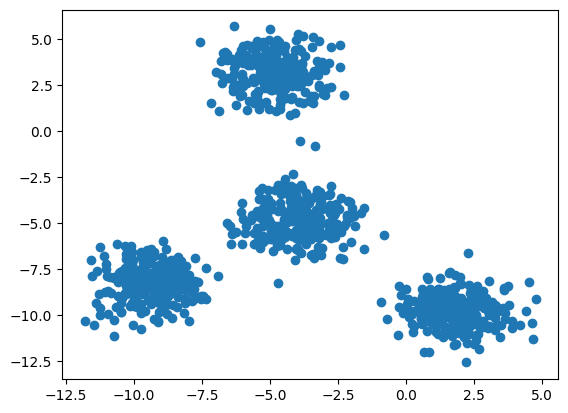

In [19]:
from sklearn.datasets import make_blobs

blobs = make_blobs(1000, 2, centers=4)
plt.scatter(blobs[0][:,0], blobs[0][:,1]);

### The multivariate normal distribution

For better understanding of the `make_blobs()` function, we following code creates a 2D surface plot of the bi-variate normal distribution. First, we defineh`

This code first defines a multivariate normal distribution with a mean of `[0.0, 0.0]` and a covariance matrix of


Next, we  0.0],[0.0, 1.0]]`. It then creates a grid of points at which using the function `meshgrid()`. Then, we o evaluae the distribution, evaluates thedistribution at theethepoints, and f.i

 surface plot of the result. You can adjust the mean and covariance matrix to change the shape of th()e distribution. The `linspace` function is used to create the gr()id of points, and the `dstack` function is used to combine the x and y coordinates into a single array. The `multivariate_normal` function is used to create the distribution, and the `pdf` method is used to evaluate the distribution at the grid points. The `plot_surface` function is used to create the surface plot. The `show` function is used to display the plot. Please make sure you have the necessary libraries installed in your Python environment. Y if neededou can install them using pip:

```bash
pip install numpy matplotlib scipy
```

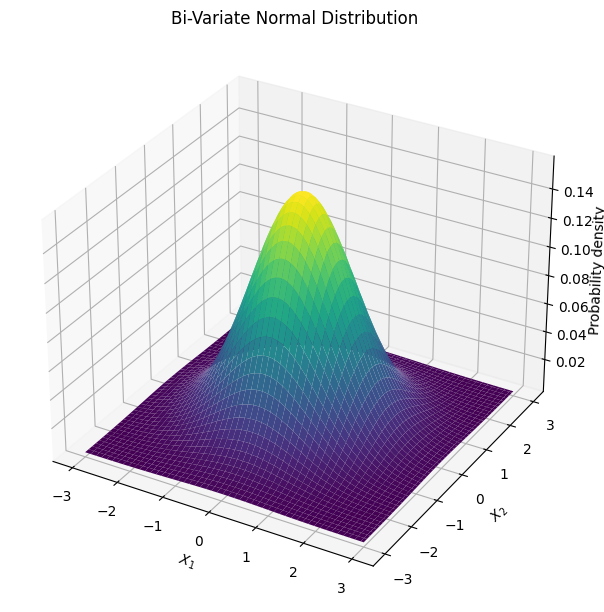

In [15]:
from scipy.stats import multivariate_normal

# Define the mean and covariance matrix for the distribution
mean = np.array([0.0, 0.0])
cov = np.array([[1.0, 0.0], [0.0, 1.0]])

# Create a grid of points at which to evaluate the distribution
x1 = np.linspace(-3, 3, 100)
x2 = np.linspace(-3, 3, 100)
X1, X2 = np.meshgrid(x1, x2)
pos = np.dstack((X1, X2))

# Create the multivariate normal distribution and evaluate it at the grid points
rv = multivariate_normal(mean, cov)
Z = rv.pdf(pos)

# Create the surface plot
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, Z, cmap='viridis')
ax.set_xlabel('$X_1$')
ax.set_ylabel('$X_2$')
ax.set_zlabel('Probability density', labelpad=1)
plt.tight_layout()
plt.title('Bi-Variate Normal Distribution')
plt.show()

## Clustering using kMeans

### Sci-Kit learn implementation of the kMeans algorithm
The following code, which is copied from the [sklearn documentation of `KMeans`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) exemplifies how you can perform kMeans-based clustering. It illustrates all relevant functions. Try to adjust the code to cluster our synthetically created data.

In [16]:
from sklearn.cluster import KMeans

# Create artificial data
X = np.array([[1, 2], [1, 4], [1, 0], [10, 2], [10, 4], [10, 0]])  

kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(X)  # run the cluster algorithm
print(kmeans.labels_)  # print the assignment of data points to clusters
print(kmeans.predict([[0, 0], [12, 3]]))  # find the cluster of a novel data point
print(kmeans.cluster_centers_)  # print the location of the cluster centroids
print(kmeans.inertia_)  # print value of the objective function

[1 1 1 0 0 0]
[1 0]
[[10.  2.]
 [ 1.  2.]]
16.0


In [17]:
# Cluster synthetic data created by make_blobs
blobs, _ = make_blobs(
    n_samples=50,
    n_features=2,
    centers=4,
    random_state=42,
)

In [20]:
kmeans.cluster_centers_

array([[-7.08688833, -6.60482195],
       [-2.82627721,  8.83484932],
       [ 4.52879768,  1.60792359],
       [-8.96834264,  7.17411088]])

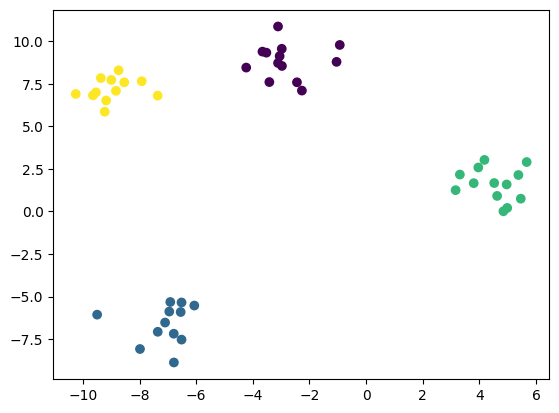

In [22]:
# KMeans clustering solution
kmeans = KMeans(n_clusters=4, n_init="auto").fit(blobs)
plt.scatter(blobs[:,0], blobs[:,1], c=kmeans.labels_);

### Elbow method to determine K

The lecture introduced you to the elbow method for determining the number of clusters. Write code to try it out. Having full control over our data, we would expect a nice curve like the one below.

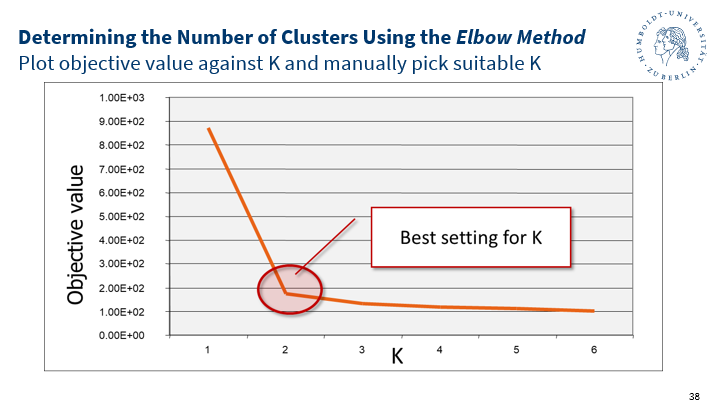

Once you created a similar plot for the synthetic data, go back to the `make_blobs()` method and adjust its arguments to examine different types of data and their clustering. For example, examine how the elbow plot changes if you create data with three cluster centers, and examine how it changes if you create overlapping clusters. To achieve this, you can use the argument `cluster_std`, which the function provides.  

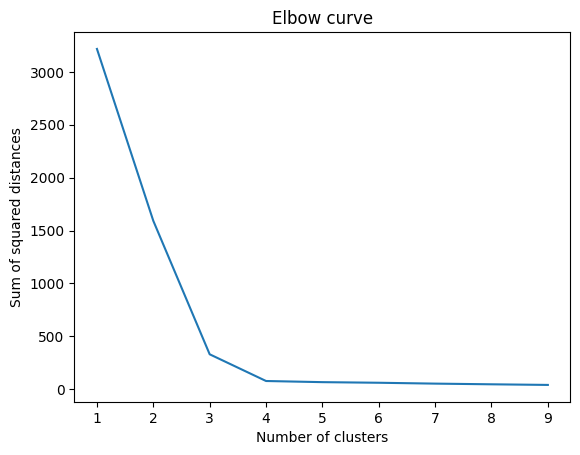

In [6]:
# Determine the number of clusters using the elbow method
inertias = []
search_range = range(1, 10)

for i in search_range:
    kmeans = KMeans(n_clusters=i, random_state=42, n_init="auto").fit(blobs)
    inertias.append(kmeans.inertia_)
    
plt.plot(search_range, inertias)
plt.title('Elbow curve')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.show()

### kMeans from scratch

With the help of ChatGPT (or Bing Copilot), produce Python code that implements the kMeans algorithm from scratch. 

In [4]:
class KMeans:
    def __init__(self, n_clusters=4, max_iter=300, random_state=42):
        '''Initialize parameters: number of clusters, max iterations, and random state'''
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state
        self.centroids = None

    def _initialize_centroids(self, X):
        '''Randomly select initial centroids from the data points'''
        np.random.seed(self.random_state)  # Set seed for reproducibility
        random_idx = np.random.permutation(X.shape[0])  # Shuffle indices
        return X[random_idx[:self.n_clusters]]  # Select first n_cluster points as centroids

    def _update_centroids(self, X, labels):
        '''Compute centroids as mean of data points in each cluster'''
        return np.array([X[labels == k].mean(axis=0) for k in range(self.n_clusters)])

    def _assign_clusters(self, X, centroids):
        '''Assign each data point to the closest cluster (centroid)'''
        distances = np.array([np.linalg.norm(X - centroid, axis=1)**2 for centroid in centroids]).T
        return np.argmin(distances, axis=1)

    def fit(self, X):
        '''Fit the model to the data'''
        self.centroids = self._initialize_centroids(X)  # Initialize centroids
        for _ in range(self.max_iter):
            old_centroids = self.centroids  # Keep track of old centroids for convergence check
            self.labels = self._assign_clusters(X, old_centroids)  # Assign clusters
            self.centroids = self._update_centroids(X, self.labels)  # Compute new centroids
            # Break the loop if centroids do not change (convergence)
            if np.all(old_centroids == self.centroids):
                break
        return self

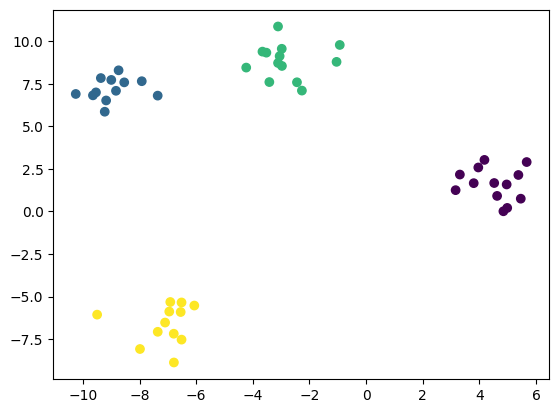

In [5]:
kmeans = KMeans(n_clusters=4).fit(blobs)
plt.scatter(blobs[:,0], blobs[:,1], c=kmeans.labels);

## Hierarchical clustering

Hierarchical clustering is a cluster analysis technique used to build a tree-like structure of clusters. It comes in two types: agglomerative (bottom-up) and divisive (top-down). Agglomerative clustering starts by treating each data point as a single cluster and iteratively merges the closest pairs until one cluster remains. It's more common and uses various linkage criteria to define cluster closeness. Divisive clustering, less common and more complex, begins with all points in one cluster and progressively splits them into smaller clusters. Its ability to reveal data structures at multiple levels makes it ideal for exploratory data analysis and understanding complex patterns where the number of clusters is not predefined.

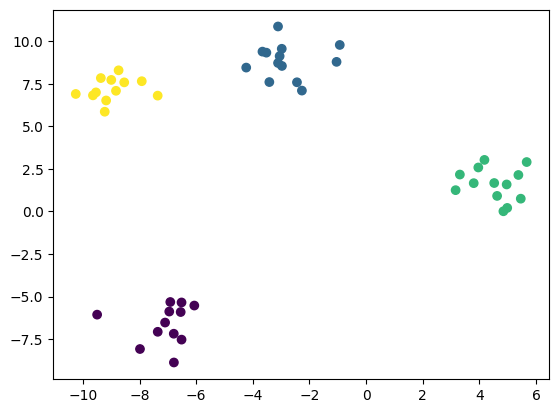

In [7]:
# Implement agglomerative clustering using sklearn
from sklearn.cluster import AgglomerativeClustering

agglo = AgglomerativeClustering(n_clusters=4).fit(blobs)
plt.scatter(blobs[:,0], blobs[:,1], c=agglo.labels_);

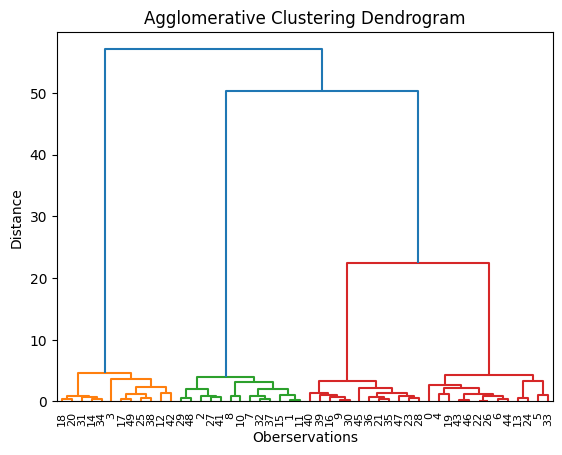

In [8]:
# Create a dendrogram to visualize the hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage

dendrogram(linkage(blobs, method='ward'))

plt.title('Agglomerative Clustering Dendrogram')
plt.xlabel('Oberservations')
plt.ylabel('Distance')
plt.show()

### Optional: Implement agglomerative clustering from scratch using ChatGPT

In [9]:
class AgglomerativeClustering:
    def __init__(self, n_clusters=4):
        '''Initialize the AgglomerativeClustering class with the specified number of clusters.'''
        self.n_clusters = n_clusters
        self.labels = None

    def _compute_distances(self, X):
        '''Compute and return the distance matrix for all pairs of points in X.'''
        return np.sqrt(((X[:, np.newaxis, :] - X[np.newaxis, :, :]) ** 2).sum(axis=2))

    def _find_closest_clusters(self, clusters, distance_matrix):
        '''Identify and return the pair of clusters that are closest to each other.'''
        min_dist = np.inf
        closest_pair = (None, None)
        for i in clusters:
            for j in clusters:
                if i != j and distance_matrix[i, j] < min_dist:
                    min_dist = distance_matrix[i, j]
                    closest_pair = (i, j)
        return closest_pair

    def fit(self, X):
        '''Fit the model to the data and return the instance itself.'''
        n_samples = X.shape[0]
        clusters = {i: [i] for i in range(n_samples)}
        self.labels = np.zeros(n_samples, dtype=int)
        distance_matrix = self._compute_distances(X)

        while len(clusters) > self.n_clusters:
            i, j = self._find_closest_clusters(clusters, distance_matrix)

            # Merge clusters i and j
            clusters[i].extend(clusters[j])
            del clusters[j]

            # Update distance matrix
            for k in clusters:
                if k != i:
                    distance_matrix[i, k] = distance_matrix[k, i] = min(distance_matrix[i, k], distance_matrix[j, k])
            distance_matrix[:, j] = distance_matrix[j, :] = np.inf

        # Assign new sequential labels
        for new_label, old_labels in enumerate(clusters.values()):
            self.labels[old_labels] = new_label

        return self

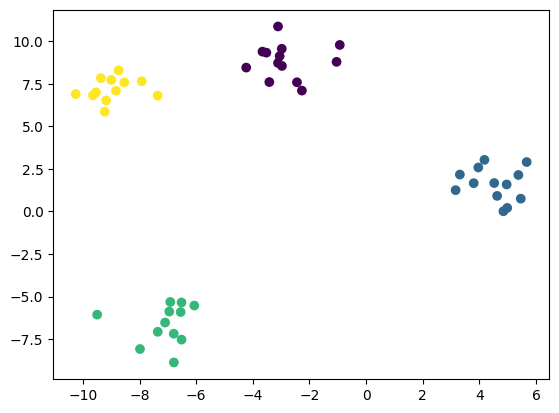

In [10]:
agglo = AgglomerativeClustering(n_clusters=4).fit(blobs)
plt.scatter(blobs[:,0], blobs[:,1], c=agglo.labels);

### Exercise: Consider the following questions

- How does hierarchical clustering differ from K-means clustering?
- How do different linkage criteria affect the clustering outcome?
- How does the scalability of hierarchical clustering with large datasets look?